In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/ymiah12/BiomarkerData/main/UGOTPTAU181_06_18_20.csv')
df.head()

,RID,VISCODE,VISCODE2,EXAMDATE,VID,PLASMAPTAU181,COMMENT,update_stamp
0,2,m60,m60,2010-09-22,9,11.939,NaN,2020-06-18 13:33:05.0
1,2,m72,m72,2011-09-19,10,12.936,NaN,2020-06-18 13:33:05.0
2,2,m84,m84,2012-09-26,11,13.563,NaN,2020-06-18 13:33:05.0
3,2,m96,m96,2013-09-09,12,15.506,NaN,2020-06-18 13:33:05.0
4,8,m60,m60,2010-09-27,9,18.305,NaN,2020-06-18 13:33:05.0


In [ ]:
df['hasAD'] = df.apply(lambda row: row.PLASMAPTAU181 > 1, axis=1)
df

,RID,VISCODE,VISCODE2,EXAMDATE,VID,PLASMAPTAU181,COMMENT,update_stamp,hasAD
0,2,m60,m60,2010-09-22,9,11.939,NaN,2020-06-18 13:33:05.0,True
1,2,m72,m72,2011-09-19,10,12.936,NaN,2020-06-18 13:33:05.0,True
2,2,m84,m84,2012-09-26,11,13.563,NaN,2020-06-18 13:33:05.0,True
3,2,m96,m96,2013-09-09,12,15.506,NaN,2020-06-18 13:33:05.0,True
4,8,m60,m60,2010-09-27,9,18.305,NaN,2020-06-18 13:33:05.0,True
...,...,...,...,...,...,...,...,...,...
3753,5294,bl,bl,2014-01-20,2,7.085,NaN,2020-06-18 13:33:07.0,True
3754,5295,bl,bl,2013-12-11,2,10.932,NaN,2020-06-18 13:33:07.0,True
3755,5295,m24,m24,2015-12-08,6,9.335,NaN,2020-06-18 13:33:07.0,True
3756,5296,bl,bl,2013-12-18,2,4.045,NaN,2020-06-18 13:33:07.0,True


In [ ]:
df = df[['RID','VID','PLASMAPTAU181','hasAD']]

df.head()

,RID,VID,PLASMAPTAU181,hasAD
0,2,9,11.939,True
1,2,10,12.936,True
2,2,11,13.563,True
3,2,12,15.506,True
4,8,9,18.305,True


In [ ]:
df.dropna()

,RID,VID,PLASMAPTAU181,hasAD
0,2,9,11.939,True
1,2,10,12.936,True
2,2,11,13.563,True
3,2,12,15.506,True
4,8,9,18.305,True
...,...,...,...,...
3753,5294,2,7.085,True
3754,5295,2,10.932,True
3755,5295,6,9.335,True
3756,5296,2,4.045,True


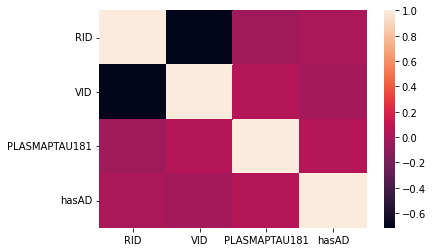

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(1)
sns.heatmap(df.corr())

In [ ]:
df = df[["RID", "VID", "PLASMAPTAU181", "hasAD"]]

In [ ]:
y = np.asarray(df["hasAD"])

y.shape

(3758,)

In [ ]:
x = df.iloc[:,:-1]

x.shape

(3758, 3)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [ ]:
df.isnull().any()

RID              False
VID              False
PLASMAPTAU181    False
hasAD            False
dtype: bool

In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train, y_train)


svm.score(x_test,y_test)

0.9957446808510638

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

rfc.score(x_test,y_test)

0.9968085106382979

In [ ]:
predicted_values = svm.predict(x_test)
actual_values = y_test

from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score

score_f1 = f1_score(actual_values, predicted_values)
score_precision = precision_score(actual_values, predicted_values)
score_recall = recall_score(actual_values, predicted_values)
score_accuracy = accuracy_score(actual_values, predicted_values)

print(score_f1, score_precision, score_recall, score_accuracy)

0.9978678038379531 0.9957446808510638 1.0 0.9957446808510638
